In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#HANDLING CATEGORICAL DATA

In [ ]:

#We must convert this categorical data into nominal data, we will use LabelEncoder for that
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
list(le.classes_)
df.sex = le.transform(df.sex)
le.fit(df.smoker.drop_duplicates())
list(le.classes_)
df.smoker = le.transform(df.smoker)
le.fit(df.region.drop_duplicates())
list(le.classes_)
df.region = le.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#GRAPHS

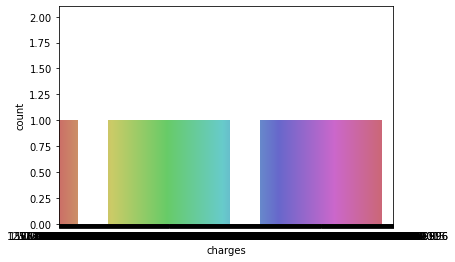

In [ ]:
seaborn.countplot(x='charges',data=df, palette='hls')
plt.show()


X = df.drop(['charges','region'], axis = 1)
y = df.charges


#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1003, 5), (1003,), (335, 5), (335,))

#NORMALIZING DATA

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

#FITTING OF TRAINING DATA

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
y_predictions = dt.predict(X_test)

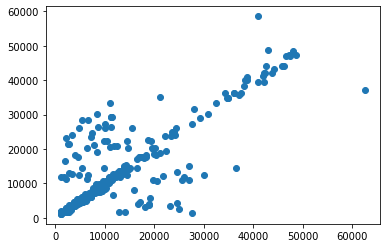

In [ ]:
plt.scatter(y_test,y_predictions)

#EVALUATION

In [ ]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1

print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(dt) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_test) 


array([22493.65964 , 13126.67745 ,  7742.1098  , 26109.32905 ,
        3956.07145 , 18157.876   ,  4877.98105 ,  5662.225   ,
       18157.876   ,  1625.43375 , 19144.57652 , 23807.2406  ,
       29186.48236 ,  1629.8335  , 43254.41795 , 11830.6072  ,
        7935.29115 , 14256.1928  , 20781.48892 ,  1917.3184  ,
        1744.465   , 12363.547   ,  4266.1658  , 10713.644   ,
       11741.726   ,  4500.33925 , 26125.67477 , 10156.7832  ,
        5383.536   ,  4922.9159  , 48885.13561 ,  3353.284   ,
        1532.4697  ,  1917.3184  ,  8733.22925 , 19521.9682  ,
       29186.48236 , 11554.2236  , 11741.726   , 20420.60465 ,
        4746.344   ,  2104.1134  , 12644.589   ,  4504.6624  ,
        2438.0552  ,  2395.17155 ,  7727.2532  ,  2254.7967  ,
       10435.06525 , 12815.44495 , 33475.81715 ,  7147.105   ,
       17496.306   , 26392.26029 ,  2801.2588  ,  7147.4728  ,
       14410.9321  , 14455.64405 , 26018.95052 ,  2473.3341  ,
        5488.262   , 18310.742   ,  1146.7966  ,  2103.

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [ ]:
y_train = y_train[0:335]
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(y_predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[335]]


Precision, Recall, Support, Fscore

In [ ]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(y_predictions)
y_train_classes[y_train > cutoff] = 1

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[335]]


Precision, Recall, Support, Fscore

In [ ]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1


from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)